## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3         X4         Y
0  38.563027  147.166810  0.189833   8.281029  0.603530
1  24.504411  216.685648  0.306205   9.965351  1.195494
2  27.471607  707.339324  0.783594   7.311948  1.501034
3   2.117146  480.824570  0.976824   7.240817  1.509928
4  83.403236  490.098278  0.787059  10.457307  1.456909


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu
epoch 0  | loss: 0.78537 | train_mse: 3.37382 | train_mae: 1.46531 |  0:00:00s


epoch 1  | loss: 0.77899 | train_mse: 3.4033  | train_mae: 1.39651 |  0:00:00s
epoch 2  | loss: 0.63378 | train_mse: 2.17874 | train_mae: 1.0428  |  0:00:00s
epoch 3  | loss: 0.5538  | train_mse: 1.84702 | train_mae: 0.84664 |  0:00:00s


epoch 4  | loss: 0.74558 | train_mse: 2.41837 | train_mae: 0.92127 |  0:00:00s
epoch 5  | loss: 0.64371 | train_mse: 1.05823 | train_mae: 0.71286 |  0:00:00s
epoch 6  | loss: 0.57586 | train_mse: 0.79181 | train_mae: 0.66989 |  0:00:00s
epoch 7  | loss: 0.58182 | train_mse: 0.87061 | train_mae: 0.67107 |  0:00:00s


epoch 8  | loss: 0.53118 | train_mse: 0.96834 | train_mae: 0.68602 |  0:00:00s
epoch 9  | loss: 0.54611 | train_mse: 0.95122 | train_mae: 0.69913 |  0:00:00s
epoch 10 | loss: 0.39866 | train_mse: 0.90666 | train_mae: 0.70298 |  0:00:00s


epoch 11 | loss: 0.45845 | train_mse: 1.00142 | train_mae: 0.73513 |  0:00:00s
epoch 12 | loss: 0.49292 | train_mse: 0.90725 | train_mae: 0.72716 |  0:00:01s
epoch 13 | loss: 0.41997 | train_mse: 0.97251 | train_mae: 0.73049 |  0:00:01s
epoch 14 | loss: 0.41198 | train_mse: 1.1075  | train_mae: 0.7419  |  0:00:01s


epoch 15 | loss: 0.37564 | train_mse: 0.91352 | train_mae: 0.68121 |  0:00:01s
epoch 16 | loss: 0.51367 | train_mse: 0.65    | train_mae: 0.56477 |  0:00:01s
epoch 17 | loss: 0.32875 | train_mse: 0.77075 | train_mae: 0.59626 |  0:00:01s
epoch 18 | loss: 0.32898 | train_mse: 0.72301 | train_mae: 0.5767  |  0:00:01s


epoch 19 | loss: 0.28985 | train_mse: 0.8223  | train_mae: 0.63434 |  0:00:01s
epoch 20 | loss: 0.43004 | train_mse: 0.8575  | train_mae: 0.67776 |  0:00:01s
epoch 21 | loss: 0.38435 | train_mse: 0.73437 | train_mae: 0.6176  |  0:00:01s
epoch 22 | loss: 0.45436 | train_mse: 0.54291 | train_mae: 0.52661 |  0:00:01s


epoch 23 | loss: 0.31509 | train_mse: 0.54153 | train_mae: 0.51697 |  0:00:01s
epoch 24 | loss: 0.29807 | train_mse: 0.50854 | train_mae: 0.50068 |  0:00:01s
epoch 25 | loss: 0.23868 | train_mse: 0.46663 | train_mae: 0.47934 |  0:00:01s


epoch 26 | loss: 0.28681 | train_mse: 0.46453 | train_mae: 0.47061 |  0:00:01s
epoch 27 | loss: 0.25694 | train_mse: 0.37427 | train_mae: 0.43652 |  0:00:02s
epoch 28 | loss: 0.25809 | train_mse: 0.35228 | train_mae: 0.41448 |  0:00:02s


epoch 29 | loss: 0.33008 | train_mse: 0.31204 | train_mae: 0.39095 |  0:00:02s
epoch 30 | loss: 0.26666 | train_mse: 0.37161 | train_mae: 0.4208  |  0:00:02s
epoch 31 | loss: 0.24756 | train_mse: 0.33615 | train_mae: 0.40161 |  0:00:02s
epoch 32 | loss: 0.19698 | train_mse: 0.29757 | train_mae: 0.39757 |  0:00:02s


epoch 33 | loss: 0.2142  | train_mse: 0.34439 | train_mae: 0.42154 |  0:00:02s
epoch 34 | loss: 0.21287 | train_mse: 0.33406 | train_mae: 0.39163 |  0:00:02s
epoch 35 | loss: 0.23552 | train_mse: 0.44155 | train_mae: 0.41204 |  0:00:02s
epoch 36 | loss: 0.23269 | train_mse: 0.53829 | train_mae: 0.44497 |  0:00:02s


epoch 37 | loss: 0.19313 | train_mse: 0.36874 | train_mae: 0.37894 |  0:00:02s
epoch 38 | loss: 0.33466 | train_mse: 0.33323 | train_mae: 0.38231 |  0:00:02s
epoch 39 | loss: 0.20294 | train_mse: 0.16065 | train_mae: 0.29592 |  0:00:02s


epoch 40 | loss: 0.259   | train_mse: 0.1232  | train_mae: 0.27396 |  0:00:02s
epoch 41 | loss: 0.24869 | train_mse: 0.21112 | train_mae: 0.3332  |  0:00:02s
epoch 42 | loss: 0.16815 | train_mse: 0.2494  | train_mae: 0.34145 |  0:00:03s
epoch 43 | loss: 0.29123 | train_mse: 0.18115 | train_mae: 0.31139 |  0:00:03s


epoch 44 | loss: 0.24812 | train_mse: 0.11859 | train_mae: 0.26633 |  0:00:03s
epoch 45 | loss: 0.22632 | train_mse: 0.11986 | train_mae: 0.26578 |  0:00:03s
epoch 46 | loss: 0.16414 | train_mse: 0.16841 | train_mae: 0.3148  |  0:00:03s


epoch 47 | loss: 0.25529 | train_mse: 0.24866 | train_mae: 0.35999 |  0:00:03s
epoch 48 | loss: 0.17117 | train_mse: 0.32368 | train_mae: 0.36243 |  0:00:03s
epoch 49 | loss: 0.15006 | train_mse: 0.27387 | train_mae: 0.3375  |  0:00:03s


epoch 50 | loss: 0.19543 | train_mse: 0.20323 | train_mae: 0.31199 |  0:00:03s
epoch 51 | loss: 0.12837 | train_mse: 0.18213 | train_mae: 0.30715 |  0:00:03s
epoch 52 | loss: 0.23131 | train_mse: 0.17151 | train_mae: 0.30782 |  0:00:03s


epoch 53 | loss: 0.15179 | train_mse: 0.14081 | train_mae: 0.29041 |  0:00:03s
epoch 54 | loss: 0.11623 | train_mse: 0.10995 | train_mae: 0.2677  |  0:00:03s
epoch 55 | loss: 0.33263 | train_mse: 0.11406 | train_mae: 0.27091 |  0:00:04s


epoch 56 | loss: 0.17269 | train_mse: 0.11266 | train_mae: 0.25434 |  0:00:04s
epoch 57 | loss: 0.14422 | train_mse: 0.10918 | train_mae: 0.25367 |  0:00:04s
epoch 58 | loss: 0.18686 | train_mse: 0.15607 | train_mae: 0.29355 |  0:00:04s


epoch 59 | loss: 0.18475 | train_mse: 0.15019 | train_mae: 0.29923 |  0:00:04s
epoch 60 | loss: 0.14312 | train_mse: 0.15434 | train_mae: 0.30514 |  0:00:04s
epoch 61 | loss: 0.24921 | train_mse: 0.16709 | train_mae: 0.31675 |  0:00:04s


epoch 62 | loss: 0.25226 | train_mse: 0.14837 | train_mae: 0.30122 |  0:00:04s
epoch 63 | loss: 0.21623 | train_mse: 0.12453 | train_mae: 0.27288 |  0:00:04s


epoch 64 | loss: 0.31069 | train_mse: 0.10831 | train_mae: 0.25748 |  0:00:04s


epoch 65 | loss: 0.18165 | train_mse: 0.13561 | train_mae: 0.27378 |  0:00:05s
epoch 66 | loss: 0.2162  | train_mse: 0.09773 | train_mae: 0.24507 |  0:00:05s
epoch 67 | loss: 0.1437  | train_mse: 0.09119 | train_mae: 0.24486 |  0:00:05s


epoch 68 | loss: 0.11218 | train_mse: 0.09559 | train_mae: 0.24672 |  0:00:05s
epoch 69 | loss: 0.14371 | train_mse: 0.10942 | train_mae: 0.25915 |  0:00:05s
epoch 70 | loss: 0.23486 | train_mse: 0.09859 | train_mae: 0.2502  |  0:00:05s
epoch 71 | loss: 0.16294 | train_mse: 0.08468 | train_mae: 0.23044 |  0:00:05s


epoch 72 | loss: 0.13536 | train_mse: 0.10718 | train_mae: 0.2526  |  0:00:05s
epoch 73 | loss: 0.10651 | train_mse: 0.13627 | train_mae: 0.27724 |  0:00:05s
epoch 74 | loss: 0.25803 | train_mse: 0.1246  | train_mae: 0.27509 |  0:00:05s


epoch 75 | loss: 0.09795 | train_mse: 0.10789 | train_mae: 0.25406 |  0:00:05s
epoch 76 | loss: 0.24974 | train_mse: 0.11785 | train_mae: 0.27045 |  0:00:05s
epoch 77 | loss: 0.24529 | train_mse: 0.10755 | train_mae: 0.26728 |  0:00:05s
epoch 78 | loss: 0.12436 | train_mse: 0.10812 | train_mae: 0.26967 |  0:00:06s


epoch 79 | loss: 0.1129  | train_mse: 0.12675 | train_mae: 0.28333 |  0:00:06s
epoch 80 | loss: 0.28878 | train_mse: 0.14184 | train_mae: 0.29751 |  0:00:06s


epoch 81 | loss: 0.11279 | train_mse: 0.09357 | train_mae: 0.24849 |  0:00:06s
epoch 82 | loss: 0.15942 | train_mse: 0.07709 | train_mae: 0.22042 |  0:00:06s
epoch 83 | loss: 0.16697 | train_mse: 0.08702 | train_mae: 0.23096 |  0:00:06s
epoch 84 | loss: 0.15159 | train_mse: 0.08963 | train_mae: 0.22612 |  0:00:06s


epoch 85 | loss: 0.13148 | train_mse: 0.11588 | train_mae: 0.25417 |  0:00:06s
epoch 86 | loss: 0.1156  | train_mse: 0.10329 | train_mae: 0.23376 |  0:00:06s
epoch 87 | loss: 0.15167 | train_mse: 0.08876 | train_mae: 0.22176 |  0:00:06s
epoch 88 | loss: 0.12763 | train_mse: 0.07949 | train_mae: 0.21995 |  0:00:06s


epoch 89 | loss: 0.17434 | train_mse: 0.07693 | train_mae: 0.22475 |  0:00:06s
epoch 90 | loss: 0.19427 | train_mse: 0.08069 | train_mae: 0.226   |  0:00:06s
epoch 91 | loss: 0.11399 | train_mse: 0.09966 | train_mae: 0.23888 |  0:00:06s


epoch 92 | loss: 0.14485 | train_mse: 0.09675 | train_mae: 0.23981 |  0:00:07s
epoch 93 | loss: 0.13783 | train_mse: 0.08526 | train_mae: 0.23245 |  0:00:07s
epoch 94 | loss: 0.12339 | train_mse: 0.09265 | train_mae: 0.24042 |  0:00:07s
epoch 95 | loss: 0.12904 | train_mse: 0.09595 | train_mae: 0.23979 |  0:00:07s


epoch 96 | loss: 0.08626 | train_mse: 0.08742 | train_mae: 0.23308 |  0:00:07s
epoch 97 | loss: 0.14032 | train_mse: 0.08503 | train_mae: 0.23677 |  0:00:07s
epoch 98 | loss: 0.32442 | train_mse: 0.09801 | train_mae: 0.25775 |  0:00:07s
epoch 99 | loss: 0.18448 | train_mse: 0.13324 | train_mae: 0.29015 |  0:00:07s


epoch 100| loss: 0.1196  | train_mse: 0.12009 | train_mae: 0.28117 |  0:00:07s
epoch 101| loss: 0.16217 | train_mse: 0.0917  | train_mae: 0.25087 |  0:00:07s
epoch 102| loss: 0.079   | train_mse: 0.08068 | train_mae: 0.24058 |  0:00:07s
epoch 103| loss: 0.21838 | train_mse: 0.07678 | train_mae: 0.22778 |  0:00:07s


epoch 104| loss: 0.15589 | train_mse: 0.07134 | train_mae: 0.22055 |  0:00:07s
epoch 105| loss: 0.15899 | train_mse: 0.07156 | train_mae: 0.21672 |  0:00:07s
epoch 106| loss: 0.17116 | train_mse: 0.07595 | train_mae: 0.21801 |  0:00:07s


epoch 107| loss: 0.11072 | train_mse: 0.07273 | train_mae: 0.20849 |  0:00:08s
epoch 108| loss: 0.19165 | train_mse: 0.08524 | train_mae: 0.22244 |  0:00:08s
epoch 109| loss: 0.16996 | train_mse: 0.11148 | train_mae: 0.2461  |  0:00:08s
epoch 110| loss: 0.14713 | train_mse: 0.11468 | train_mae: 0.26761 |  0:00:08s


epoch 111| loss: 0.13419 | train_mse: 0.08054 | train_mae: 0.22692 |  0:00:08s
epoch 112| loss: 0.17991 | train_mse: 0.08515 | train_mae: 0.22814 |  0:00:08s
epoch 113| loss: 0.11464 | train_mse: 0.08316 | train_mae: 0.23138 |  0:00:08s
epoch 114| loss: 0.10278 | train_mse: 0.08232 | train_mae: 0.22665 |  0:00:08s


epoch 115| loss: 0.10664 | train_mse: 0.0911  | train_mae: 0.23491 |  0:00:08s
epoch 116| loss: 0.08288 | train_mse: 0.08701 | train_mae: 0.22339 |  0:00:08s
epoch 117| loss: 0.18836 | train_mse: 0.07803 | train_mae: 0.22219 |  0:00:08s
epoch 118| loss: 0.1544  | train_mse: 0.08334 | train_mae: 0.23467 |  0:00:08s


epoch 119| loss: 0.16325 | train_mse: 0.07394 | train_mae: 0.22073 |  0:00:08s
epoch 120| loss: 0.17601 | train_mse: 0.07361 | train_mae: 0.21403 |  0:00:08s
epoch 121| loss: 0.13268 | train_mse: 0.08966 | train_mae: 0.22713 |  0:00:08s
epoch 122| loss: 0.14871 | train_mse: 0.09346 | train_mae: 0.22506 |  0:00:09s


epoch 123| loss: 0.13274 | train_mse: 0.09004 | train_mae: 0.22255 |  0:00:09s
epoch 124| loss: 0.22661 | train_mse: 0.08398 | train_mae: 0.21855 |  0:00:09s
epoch 125| loss: 0.15981 | train_mse: 0.10141 | train_mae: 0.23869 |  0:00:09s
epoch 126| loss: 0.21039 | train_mse: 0.12065 | train_mae: 0.25437 |  0:00:09s


epoch 127| loss: 0.11307 | train_mse: 0.09222 | train_mae: 0.2264  |  0:00:09s
epoch 128| loss: 0.11391 | train_mse: 0.07576 | train_mae: 0.2251  |  0:00:09s
epoch 129| loss: 0.25194 | train_mse: 0.09285 | train_mae: 0.24586 |  0:00:09s


epoch 130| loss: 0.10782 | train_mse: 0.07094 | train_mae: 0.21982 |  0:00:09s
epoch 131| loss: 0.17772 | train_mse: 0.09156 | train_mae: 0.24315 |  0:00:09s
epoch 132| loss: 0.13759 | train_mse: 0.06996 | train_mae: 0.21449 |  0:00:09s
epoch 133| loss: 0.1661  | train_mse: 0.06058 | train_mae: 0.20101 |  0:00:09s


epoch 134| loss: 0.19707 | train_mse: 0.06701 | train_mae: 0.2039  |  0:00:09s
epoch 135| loss: 0.2502  | train_mse: 0.08113 | train_mae: 0.22567 |  0:00:09s
epoch 136| loss: 0.11379 | train_mse: 0.06525 | train_mae: 0.199   |  0:00:10s


epoch 137| loss: 0.19304 | train_mse: 0.07935 | train_mae: 0.21835 |  0:00:10s
epoch 138| loss: 0.09971 | train_mse: 0.09133 | train_mae: 0.23867 |  0:00:10s
epoch 139| loss: 0.13492 | train_mse: 0.07579 | train_mae: 0.21479 |  0:00:10s


epoch 140| loss: 0.14349 | train_mse: 0.07695 | train_mae: 0.21514 |  0:00:10s
epoch 141| loss: 0.12268 | train_mse: 0.09892 | train_mae: 0.24515 |  0:00:10s
epoch 142| loss: 0.30722 | train_mse: 0.19414 | train_mae: 0.31333 |  0:00:10s
epoch 143| loss: 0.27721 | train_mse: 0.23861 | train_mae: 0.34805 |  0:00:10s


epoch 144| loss: 0.17402 | train_mse: 0.09792 | train_mae: 0.2505  |  0:00:10s
epoch 145| loss: 0.10722 | train_mse: 0.07139 | train_mae: 0.20512 |  0:00:10s
epoch 146| loss: 0.12379 | train_mse: 0.07446 | train_mae: 0.20448 |  0:00:10s


epoch 147| loss: 0.1156  | train_mse: 0.07123 | train_mae: 0.20012 |  0:00:10s
epoch 148| loss: 0.15094 | train_mse: 0.06707 | train_mae: 0.19552 |  0:00:10s
epoch 149| loss: 0.17253 | train_mse: 0.07652 | train_mae: 0.20311 |  0:00:10s


epoch 150| loss: 0.09152 | train_mse: 0.08412 | train_mae: 0.21559 |  0:00:10s
epoch 151| loss: 0.12384 | train_mse: 0.11502 | train_mae: 0.24422 |  0:00:11s
epoch 152| loss: 0.16795 | train_mse: 0.12199 | train_mae: 0.24827 |  0:00:11s
epoch 153| loss: 0.05538 | train_mse: 0.09628 | train_mae: 0.22352 |  0:00:11s


epoch 154| loss: 0.0759  | train_mse: 0.08055 | train_mae: 0.20113 |  0:00:11s
epoch 155| loss: 0.07921 | train_mse: 0.07959 | train_mae: 0.18992 |  0:00:11s
epoch 156| loss: 0.12116 | train_mse: 0.07704 | train_mae: 0.18906 |  0:00:11s


epoch 157| loss: 0.0821  | train_mse: 0.06446 | train_mae: 0.18511 |  0:00:11s
epoch 158| loss: 0.10473 | train_mse: 0.05751 | train_mae: 0.17763 |  0:00:11s
epoch 159| loss: 0.17336 | train_mse: 0.05101 | train_mae: 0.16522 |  0:00:11s


epoch 160| loss: 0.11854 | train_mse: 0.05129 | train_mae: 0.16513 |  0:00:11s
epoch 161| loss: 0.15059 | train_mse: 0.05665 | train_mae: 0.17885 |  0:00:11s
epoch 162| loss: 0.09536 | train_mse: 0.05657 | train_mae: 0.1831  |  0:00:11s


epoch 163| loss: 0.09732 | train_mse: 0.06755 | train_mae: 0.18923 |  0:00:11s
epoch 164| loss: 0.10753 | train_mse: 0.06941 | train_mae: 0.19331 |  0:00:12s
epoch 165| loss: 0.1073  | train_mse: 0.06638 | train_mae: 0.20232 |  0:00:12s
epoch 166| loss: 0.24501 | train_mse: 0.07348 | train_mae: 0.21962 |  0:00:12s


epoch 167| loss: 0.17745 | train_mse: 0.11318 | train_mae: 0.24468 |  0:00:12s
epoch 168| loss: 0.18734 | train_mse: 0.12537 | train_mae: 0.24422 |  0:00:12s
epoch 169| loss: 0.19939 | train_mse: 0.11406 | train_mae: 0.23398 |  0:00:12s
epoch 170| loss: 0.08935 | train_mse: 0.0831  | train_mae: 0.21588 |  0:00:12s


epoch 171| loss: 0.15631 | train_mse: 0.07686 | train_mae: 0.21014 |  0:00:12s
epoch 172| loss: 0.10317 | train_mse: 0.07711 | train_mae: 0.20367 |  0:00:12s
epoch 173| loss: 0.14674 | train_mse: 0.08064 | train_mae: 0.20871 |  0:00:12s
epoch 174| loss: 0.09394 | train_mse: 0.08988 | train_mae: 0.21694 |  0:00:12s


epoch 175| loss: 0.08458 | train_mse: 0.07789 | train_mae: 0.20315 |  0:00:12s
epoch 176| loss: 0.15875 | train_mse: 0.09112 | train_mae: 0.21165 |  0:00:12s
epoch 177| loss: 0.12876 | train_mse: 0.10609 | train_mae: 0.22085 |  0:00:12s


epoch 178| loss: 0.07182 | train_mse: 0.10948 | train_mae: 0.22611 |  0:00:12s
epoch 179| loss: 0.11717 | train_mse: 0.11077 | train_mae: 0.22637 |  0:00:13s
epoch 180| loss: 0.1538  | train_mse: 0.09987 | train_mae: 0.22175 |  0:00:13s
epoch 181| loss: 0.07936 | train_mse: 0.09254 | train_mae: 0.21959 |  0:00:13s


epoch 182| loss: 0.09738 | train_mse: 0.09026 | train_mae: 0.21876 |  0:00:13s
epoch 183| loss: 0.09068 | train_mse: 0.08469 | train_mae: 0.21719 |  0:00:13s
epoch 184| loss: 0.08985 | train_mse: 0.09333 | train_mae: 0.23364 |  0:00:13s


epoch 185| loss: 0.10979 | train_mse: 0.11005 | train_mae: 0.24606 |  0:00:13s
epoch 186| loss: 0.07325 | train_mse: 0.10634 | train_mae: 0.23878 |  0:00:13s
epoch 187| loss: 0.21778 | train_mse: 0.1033  | train_mae: 0.23497 |  0:00:13s
epoch 188| loss: 0.08145 | train_mse: 0.09281 | train_mae: 0.22013 |  0:00:13s


epoch 189| loss: 0.11926 | train_mse: 0.0784  | train_mae: 0.20082 |  0:00:13s
epoch 190| loss: 0.12753 | train_mse: 0.06333 | train_mae: 0.18521 |  0:00:13s
epoch 191| loss: 0.09371 | train_mse: 0.0573  | train_mae: 0.18304 |  0:00:13s


epoch 192| loss: 0.08365 | train_mse: 0.06075 | train_mae: 0.18598 |  0:00:13s
epoch 193| loss: 0.08948 | train_mse: 0.056   | train_mae: 0.17834 |  0:00:13s
epoch 194| loss: 0.13789 | train_mse: 0.05525 | train_mae: 0.18071 |  0:00:14s
epoch 195| loss: 0.07579 | train_mse: 0.04917 | train_mae: 0.17843 |  0:00:14s


epoch 196| loss: 0.09432 | train_mse: 0.0495  | train_mae: 0.1745  |  0:00:14s
epoch 197| loss: 0.13566 | train_mse: 0.09882 | train_mae: 0.23344 |  0:00:14s
epoch 198| loss: 0.11203 | train_mse: 0.11867 | train_mae: 0.24103 |  0:00:14s
epoch 199| loss: 0.10249 | train_mse: 0.11767 | train_mae: 0.23259 |  0:00:14s


epoch 200| loss: 0.1102  | train_mse: 0.11303 | train_mae: 0.23778 |  0:00:14s
epoch 201| loss: 0.1126  | train_mse: 0.08823 | train_mae: 0.21665 |  0:00:14s
epoch 202| loss: 0.12643 | train_mse: 0.07747 | train_mae: 0.21688 |  0:00:14s
epoch 203| loss: 0.10412 | train_mse: 0.06558 | train_mae: 0.2032  |  0:00:14s


epoch 204| loss: 0.12316 | train_mse: 0.05265 | train_mae: 0.18365 |  0:00:14s
epoch 205| loss: 0.08431 | train_mse: 0.06212 | train_mae: 0.19192 |  0:00:14s
epoch 206| loss: 0.08589 | train_mse: 0.07942 | train_mae: 0.21267 |  0:00:14s
epoch 207| loss: 0.14993 | train_mse: 0.07911 | train_mae: 0.21129 |  0:00:14s


epoch 208| loss: 0.13611 | train_mse: 0.06931 | train_mae: 0.19799 |  0:00:14s
epoch 209| loss: 0.1151  | train_mse: 0.07483 | train_mae: 0.21251 |  0:00:15s
epoch 210| loss: 0.20554 | train_mse: 0.07237 | train_mae: 0.21454 |  0:00:15s

Early stopping occurred at epoch 210 with best_epoch = 160 and best_train_mae = 0.16513
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

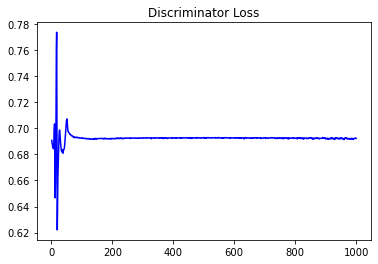

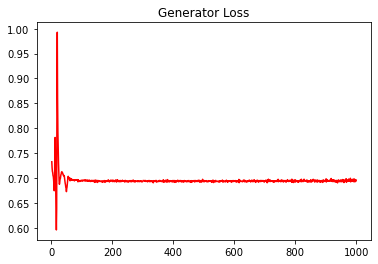

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3509901259542944


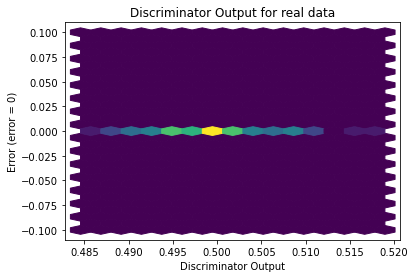

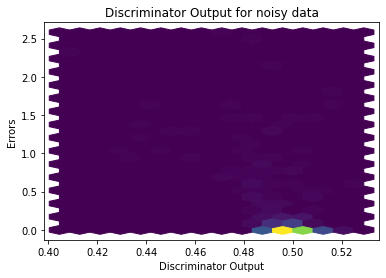

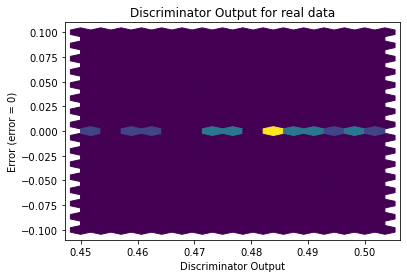

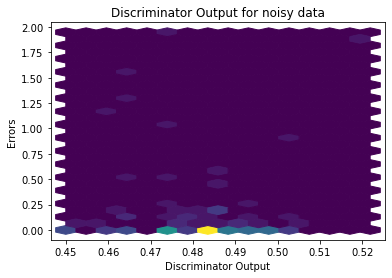

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


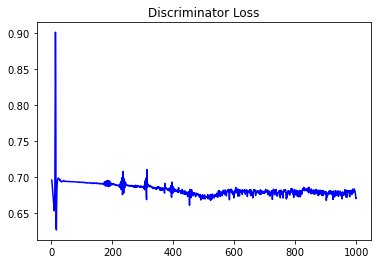

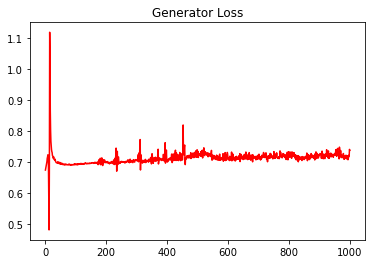

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.381267167141452


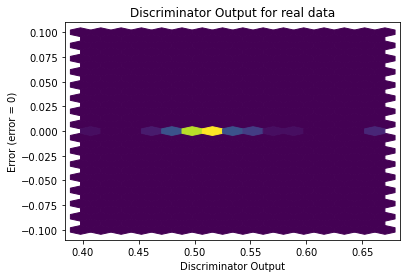

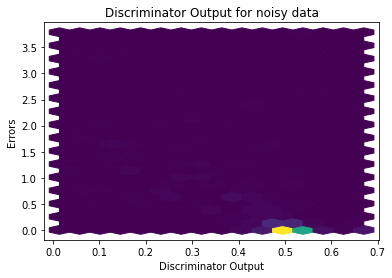

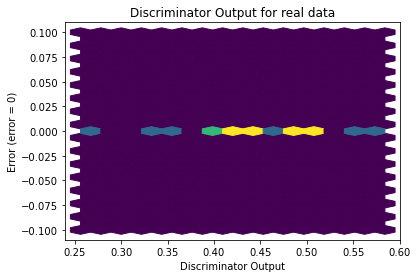

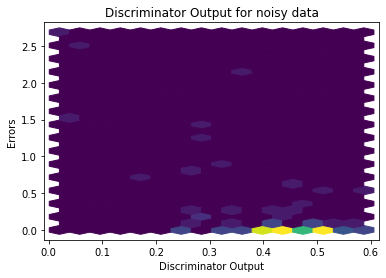

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0989]], requires_grad=True)
